In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam


In [5]:

# Define the path to your dataset root directory
root_dir = "/content/drive/MyDrive/Hackathon/CEDAR"

In [6]:


# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if not os.path.isfile(image_path):
                continue
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read images in color
            if image is None:
                continue
            image = cv2.resize(image, (100, 100))  # Resize image to 100x100
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(class_index)  # Assign numerical label based on class index
    return np.array(images), np.array(labels)


In [7]:

# Load data from your dataset root directory
data, labels = load_images(root_dir)


In [8]:
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:


# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers in the base model (we don't want to train them again)
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers on top of the base model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_acc)


58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/10
67/67 [==============================] - 318s 5s/step - loss: 3.7610 - accuracy: 0.0972 - val_loss: 3.1926 - val_accuracy: 0.4334
Epoch 2/10
67/67 [==============================] - 317s 5s/step - loss: 2.9666 - accuracy: 0.2601 - val_loss: 2.3479 - val_accuracy: 0.6360
Epoch 3/10
67/67 [==============================] - 333s 5s/step - loss: 2.3734 - accuracy: 0.3939 - val_loss: 1.7872 - val_accuracy: 0.7223
Epoch 4/10
67/67 [==============================] - 333s 5s/step - loss: 1.9257 - accuracy: 0.5052 - val_loss: 1.3366 - val_accuracy: 0.7955
Epoch 5/10
67/67 [==============================] - 330s 5s/step - loss: 1.6613 - accuracy: 0.5587 - val_loss: 1.0747 - val_accuracy: 0.8668
Epoch 6/10
67/67 [==============================] - 333s 5s/step - loss: 1.3941 - accuracy: 0.6192 - val_loss: 0.8512 - val_accuracy: 0.9024
Epoch 7/10
67/67 [==============================] - 333s 5s/step - loss: 1.2257 - accuracy: 0.6709 - val_loss: 0.6815 - val_accuracy: 0.9174
Epoch 8/10
67

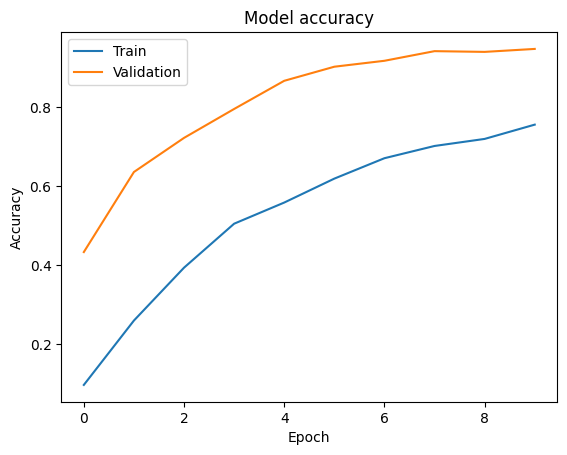

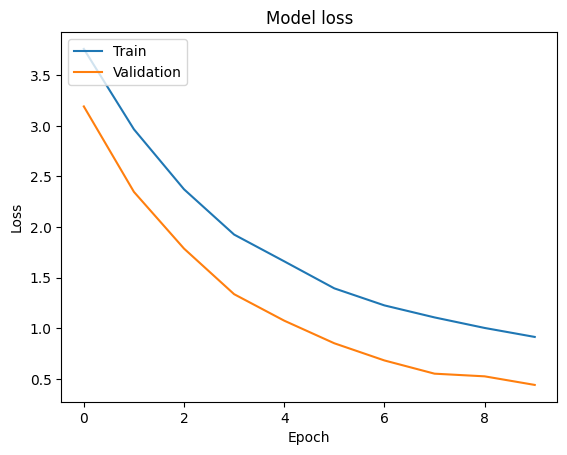

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
